In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [ ]:
!pip install pyts
!pip install einops
!pip install timm
!pip install PyWavelets
!pip install ptflops
from google.colab import drive
drive.mount('/gdrive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ptflops: filename=ptflops-0.7.2.1-py3-none-any.whl size=14624 sha256=ffebc74a97e7a8c40a8db044f47a9ad81d01917573dd60c52117d1408e97a463
  Stored in directory: /root/.cache/pip/wheels/11/5b/6e/1b92ceb35b439570ee290b95b0054dfe025e55d5dae77c9212
Successfully built ptflops
Mounted at /gdrive


In [ ]:
!pip install aeon

In [ ]:
import datetime
import os
import pywt
import pyts
import random
import torch
import torch.nn as nn
from torchsummary import summary
import pdb
from timm.data import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from timm.models.layers import DropPath, trunc_normal_
from timm.models.registry import register_model
from timm.models.layers import to_2tuple

import math
from torch import Tensor
from torch.nn import init
from torch.nn.modules.utils import _pair
from torchvision.ops.deform_conv import deform_conv2d as deform_conv2d_tv
import numpy as np
import copy
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pylab as plt
import pandas as pd
from pyts.image import RecurrencePlot, GramianAngularField, MarkovTransitionField
from pyts.datasets import fetch_ucr_dataset, ucr_dataset_list
from einops.layers.torch import Rearrange, Reduce
import time
from ptflops import get_model_complexity_info

In [ ]:
PATH = "/gdrive/MyDrive/model/cycle/"
DATA_PATH = "/gdrive/MyDrive/Data/UCR/"
global best_acc
global best_loss
best_acc = 0
best_loss = 1
print(torch.cuda.is_available())
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

True
cuda:0


# Data set

In [ ]:
ucr = fetch_ucr_dataset('Coffee', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((28,286,1)))
ucr_test_re = resize(ucr_test, ((28,286,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Car', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((60,577,1)))
ucr_test_re = resize(ucr_test, ((60,577,1)))
class_num = 4
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ArrowHead', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((36,251,1)))
ucr_test_re = resize(ucr_test, ((175,251,1)))
class_num = 3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('BeetleFly', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((20,512,1)))
ucr_test_re = resize(ucr_test, ((20,512,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('BirdChicken', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((20,512,1)))
ucr_test_re = resize(ucr_test, ((20,512,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('CinCECGtorso', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((40,256,1)))
ucr_test_re = resize(ucr_test, ((1380,256,1)))
class_num = 4
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Computers', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((250,256,1)))
ucr_test_re = resize(ucr_test, ((250,256,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('CricketX', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((390,300,1)))
ucr_test_re = resize(ucr_test, ((390,300,1)))
class_num = 12
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('CricketY', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((390,300,1)))
ucr_test_re = resize(ucr_test, ((390,300,1)))
class_num = 12
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('CricketZ', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((390,300,1)))
ucr_test_re = resize(ucr_test, ((390,300,1)))
class_num = 12
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('DiatomSizeReduction', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((16,345,1)))
ucr_test_re = resize(ucr_test, ((306,345,1)))
class_num = 4
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('DistalPhalanxOutlineAgeGroup', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((400,80,1)))
ucr_test_re = resize(ucr_test, ((139,80,1)))
class_num = 3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('DistalPhalanxOutlineCorrect', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((600,80,1)))
ucr_test_re = resize(ucr_test, ((276,80,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('DistalPhalanxTW', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((400,80,1)))
ucr_test_re = resize(ucr_test, ((139,80,1)))
class_num = 6
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Earthquakes', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((322,512,1)))
ucr_test_re = resize(ucr_test, ((139,512,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ElectricDevices', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((8926,96,1)))
ucr_test_re = resize(ucr_test, ((7711,96,1)))
class_num = 7
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('FacesUCR', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((200,131,1)))
ucr_test_re = resize(ucr_test, ((2050,131,1)))
class_num = 14
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('FiftyWords', use_cache=True, data_home = DATA_PATH, return_X_y=False)
ucr_train = ucr.data_train
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((455,270,1)))
ucr_test_re = resize(ucr_test, ((450,270,1)))
class_num = 50
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Fish', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((175,463,1)))
ucr_test_re = resize(ucr_test, ((175,463,1)))
class_num = 7
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('FordA', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((3601,500,1)))
ucr_test_re = resize(ucr_test, ((1320,500,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('FordB', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((3636,500,1)))
ucr_test_re = resize(ucr_test, ((810,500,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Ham', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((109,431,1)))
ucr_test_re = resize(ucr_test, ((105,431,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Herring', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((64,512,1)))
ucr_test_re = resize(ucr_test, ((64,512,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ItalyPowerDemand', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((67,24,1)))
ucr_test_re = resize(ucr_test, ((1029,24,1)))
class_num =2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('LargeKitchenAppliances', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((375,720,1)))
ucr_test_re = resize(ucr_test, ((375,720,1)))
class_num =3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Meat', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((60,448,1)))
ucr_test_re = resize(ucr_test, ((60,448,1)))
class_num =3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('MedicalImages', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((381,99,1)))
ucr_test_re = resize(ucr_test, ((760,99,1)))
class_num =10
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('MiddlePhalanxOutlineAgeGroup', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((400,80,1)))
ucr_test_re = resize(ucr_test, ((154,80,1)))
class_num =3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('MiddlePhalanxOutlineCorrect', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((600,80,1)))
ucr_test_re = resize(ucr_test, ((291,80,1)))
class_num =2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('MiddlePhalanxTW', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((399,80,1)))
ucr_test_re = resize(ucr_test, ((154,80,1)))
class_num =6
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('MoteStrain', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((20,84,1)))
ucr_test_re = resize(ucr_test, ((1252,84,1)))
class_num =2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('OliveOil', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((30,570,1)))
ucr_test_re = resize(ucr_test, ((30,570,1)))
class_num =4
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('PhalangesOutlinesCorrect', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((1800,80,1)))
ucr_test_re = resize(ucr_test, ((858,80,1)))
class_num =2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Phoneme', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((214,128,1)))
ucr_test_re = resize(ucr_test, ((1896,128,1)))
class_num =39
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Plane', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((105,144,1)))
ucr_test_re = resize(ucr_test, ((105,144,1)))
class_num =7
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ProximalPhalanxOutlineAgeGroup', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((400,80,1)))
ucr_test_re = resize(ucr_test, ((205,80,1)))
class_num =3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ProximalPhalanxOutlineCorrect', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((600,80,1)))
ucr_test_re = resize(ucr_test, ((291,80,1)))
class_num =2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ProximalPhalanxTW', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((400,80,1)))
ucr_test_re = resize(ucr_test, ((205,80,1)))
class_num =6
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('RefrigerationDevices', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((375,720,1)))
ucr_test_re = resize(ucr_test, ((375,720,1)))
class_num =3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ScreenType', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((375,720,1)))
ucr_test_re = resize(ucr_test, ((375,720,1)))
class_num =3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ShapeletSim', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((20,500,1)))
ucr_test_re = resize(ucr_test, ((180,500,1)))
class_num =2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ShapesAll', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((600,512,1)))
ucr_test_re = resize(ucr_test, ((600,512,1)))
class_num =60
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('SmallKitchenAppliances', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((375,720,1)))
ucr_test_re = resize(ucr_test, ((375,720,1)))
class_num =3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('SonyAIBORobotSurface1', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((20,70,1)))
ucr_test_re = resize(ucr_test, ((601,70,1)))
class_num =2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('SonyAIBORobotSurface2', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((27,65,1)))
ucr_test_re = resize(ucr_test, ((953,65,1)))
class_num =2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Adiac', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((390,176,1)))
ucr_test_re = resize(ucr_test, ((391,176,1)))
class_num = 37
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Strawberry', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((613,235,1)))
ucr_test_re = resize(ucr_test, ((370,235,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('SwedishLeaf', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((500,128,1)))
ucr_test_re = resize(ucr_test, ((625,128,1)))
class_num = 15
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Symbols', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((25,398,1)))
ucr_test_re = resize(ucr_test, ((995,398,1)))
class_num = 6
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('SyntheticControl', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((300,60,1)))
ucr_test_re = resize(ucr_test, ((300,60,1)))
class_num = 6
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ToeSegmentation1', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((40,277,1)))
ucr_test_re = resize(ucr_test, ((228,277,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ToeSegmentation2', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((36,343,1)))
ucr_test_re = resize(ucr_test, ((130,343,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('TwoLeadECG', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((23,82,1)))
ucr_test_re = resize(ucr_test, ((1139,82,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('UWaveGestureLibraryX', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((896,315,1)))
ucr_test_re = resize(ucr_test, ((3582,315,1)))
class_num = 8
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('UWaveGestureLibraryY', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((896,315,1)))
ucr_test_re = resize(ucr_test, ((3582,315,1)))
class_num = 8
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('UWaveGestureLibraryZ', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((896,315,1)))
ucr_test_re = resize(ucr_test, ((3582,315,1)))
class_num = 8
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Wafer', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((1000,152,1)))
ucr_test_re = resize(ucr_test, ((6164,152,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Wine', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((57,234,1)))
ucr_test_re = resize(ucr_test, ((54,234,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('WordSynonyms', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((267,270,1)))
ucr_test_re = resize(ucr_test, ((638,270,1)))
class_num = 25
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Worms', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((181,900,1)))
ucr_test_re = resize(ucr_test, ((77,900,1)))
class_num = 5
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('WormsTwoClass', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((181,900,1)))
ucr_test_re = resize(ucr_test, ((77,900,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ChlorineConcentration', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((467,166,1)))
ucr_test_re = resize(ucr_test, ((3840,166,1)))
class_num = 3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('CBF', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((30,128,1)))
ucr_test_re = resize(ucr_test, ((900,128,1)))
class_num = 3
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('GunPoint', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((150,150,1)))
ucr_test_re = resize(ucr_test, ((150,150,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Lightning7', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((70,319,1)))
ucr_test_re = resize(ucr_test, ((73,319,1)))
class_num = 7
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('Yoga', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((300,426,1)))
ucr_test_re = resize(ucr_test, ((3000,426,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
ucr = fetch_ucr_dataset('ShapeletSim', use_cache=True, data_home = DATA_PATH, return_X_y=False) # 5 class
ucr_train = ucr.data_train  # 390, 176
ucr_target_train = ucr.target_train
ucr_test = ucr.data_test
ucr_target_test = ucr.target_test
ucr_train_re = resize(ucr_train, ((20,500,1)))
ucr_test_re = resize(ucr_test, ((180,500,1)))
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
pyts.datasets.ucr_dataset_list()

['ACSF1',
 'Adiac',
 'AllGestureWiimoteX',
 'AllGestureWiimoteY',
 'AllGestureWiimoteZ',
 'ArrowHead',
 'BME',
 'Beef',
 'BeetleFly',
 'BirdChicken',
 'CBF',
 'Car',
 'Chinatown',
 'ChlorineConcentration',
 'CinCECGtorso',
 'Coffee',
 'Computers',
 'CricketX',
 'CricketY',
 'CricketZ',
 'Crop',
 'DiatomSizeReduction',
 'DistalPhalanxOutlineAgeGroup',
 'DistalPhalanxOutlineCorrect',
 'DistalPhalanxTW',
 'DodgerLoopDay',
 'DodgerLoopGame',
 'DodgerLoopWeekend',
 'ECG200',
 'ECG5000',
 'ECGFiveDays',
 'EOGHorizontalSignal',
 'EOGVerticalSignal',
 'Earthquakes',
 'ElectricDevices',
 'EthanolLevel',
 'FaceAll',
 'FaceFour',
 'FacesUCR',
 'FiftyWords',
 'Fish',
 'FordA',
 'FordB',
 'FreezerRegularTrain',
 'FreezerSmallTrain',
 'Fungi',
 'GestureMidAirD1',
 'GestureMidAirD2',
 'GestureMidAirD3',
 'GesturePebbleZ1',
 'GesturePebbleZ2',
 'GunPoint',
 'GunPointAgeSpan',
 'GunPointMaleVersusFemale',
 'GunPointOldVersusYoung',
 'Ham',
 'HandOutlines',
 'Haptics',
 'Herring',
 'HouseTwenty',
 'Inli

In [ ]:
pyts.datasets.ucr_dataset_info()

{'ACSF1': {'n_classes': 10,
  'n_timestamps': '1460',
  'test_size': 100,
  'train_size': 100,
  'type': 'DEVICE'},
 'Adiac': {'n_classes': 37,
  'n_timestamps': '176',
  'test_size': 391,
  'train_size': 390,
  'type': 'IMAGE'},
 'AllGestureWiimoteX': {'n_classes': 10,
  'n_timestamps': 'Varying',
  'test_size': 700,
  'train_size': 300,
  'type': 'MOTION'},
 'AllGestureWiimoteY': {'n_classes': 10,
  'n_timestamps': 'Varying',
  'test_size': 700,
  'train_size': 300,
  'type': 'MOTION'},
 'AllGestureWiimoteZ': {'n_classes': 10,
  'n_timestamps': 'Varying',
  'test_size': 700,
  'train_size': 300,
  'type': 'MOTION'},
 'ArrowHead': {'n_classes': 3,
  'n_timestamps': '251',
  'test_size': 175,
  'train_size': 36,
  'type': 'IMAGE'},
 'BME': {'n_classes': 3,
  'n_timestamps': '128',
  'test_size': 150,
  'train_size': 30,
  'type': 'SIMULATED'},
 'Beef': {'n_classes': 5,
  'n_timestamps': '470',
  'test_size': 30,
  'train_size': 30,
  'type': 'SPECTRO'},
 'BeetleFly': {'n_classes': 2,
 

In [ ]:
class_num = 2
train_size = len(ucr_train)
test_size = len(ucr_test)
input_size = 64

In [ ]:
#print(ucr_target_train)
trencoder = LabelEncoder()
trencoder.fit(ucr_target_train)
ucr_target_train = trencoder.transform(ucr_target_train)
#print(ucr_target_train)

In [ ]:
#print(ucr_target_test)
teencoder = LabelEncoder()
teencoder.fit(ucr_target_test)
ucr_target_test = teencoder.transform(ucr_target_test)
#print(ucr_target_test)

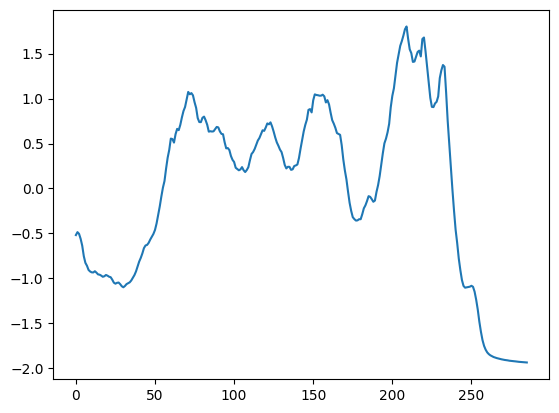

In [ ]:
for i in range(1):
    plt.plot(ucr_train_re[i], label="original")
    plt.show()

# continuous wavelet test

# time series decomposition

In [ ]:
class moving_avg(nn.Module):
    """
    Moving average block to highlight the trend of time series
    """
    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # padding on the both ends of time series
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1)) # batch, channel, length
        x = x.permute(0, 2, 1) # batch, length, channel
        return x

In [ ]:
class series_decomp(nn.Module):
    """
    Series decomposition block
    """
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        #print("moving", moving_mean.size())
        res = x - moving_mean
        return res, moving_mean, x

# Broadcycle model

In [ ]:
class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x

In [ ]:
class CycleFC(nn.Module):
    """
    """

    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        kernel_size,  # re-defined kernel_size, represent the spatial area of staircase FC
        stride: int = 1,
        padding: int = 0,
        dilation: int = 1,
        groups: int = 1,
        bias: bool = True,
    ):
        super(CycleFC, self).__init__()

        if in_channels % groups != 0:
            raise ValueError('in_channels must be divisible by groups')
        if out_channels % groups != 0:
            raise ValueError('out_channels must be divisible by groups')
        if stride != 1:
            raise ValueError('stride must be 1')
        if padding != 0:
            raise ValueError('padding must be 0')

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = _pair(stride)
        self.padding = _pair(padding)
        self.dilation = _pair(dilation)
        self.groups = groups

        self.weight = nn.Parameter(torch.empty(out_channels, in_channels // groups, 1, 1))

        if bias:
            self.bias = nn.Parameter(torch.empty(out_channels))
        else:
            self.register_parameter('bias', None)
        self.register_buffer('offset', self.gen_offset())

        self.reset_parameters()

    def reset_parameters(self) -> None:
        init.kaiming_uniform_(self.weight, a=math.sqrt(5))

        if self.bias is not None:
            fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight)
            bound = 1 / math.sqrt(fan_in)
            init.uniform_(self.bias, -bound, bound)

    def gen_offset(self):
        """
        offset (Tensor[batch_size, 2 * offset_groups * kernel_height * kernel_width,
            out_height, out_width]): offsets to be applied for each position in the
            convolution kernel.
        """
        offset = torch.empty(1, self.in_channels*2, 1, 1)
        start_idx = (self.kernel_size[0] * self.kernel_size[1]) // 2
        assert self.kernel_size[0] == 1 or self.kernel_size[1] == 1, self.kernel_size
        for i in range(self.in_channels):
            if self.kernel_size[0] == 1:
                offset[0, 2 * i + 0, 0, 0] = 0
                offset[0, 2 * i + 1, 0, 0] = (i + start_idx) % self.kernel_size[1] - (self.kernel_size[1] // 2)
            else:
                offset[0, 2 * i + 0, 0, 0] = (i + start_idx) % self.kernel_size[0] - (self.kernel_size[0] // 2)
                offset[0, 2 * i + 1, 0, 0] = 0
        return offset

    def forward(self, input: Tensor) -> Tensor:
        """
        Args:
            input (Tensor[batch_size, in_channels, in_height, in_width]): input tensor
        """
        B, C, H, W = input.size()
        return deform_conv2d_tv(input, self.offset.expand(B, -1, H, W), self.weight, self.bias, stride=self.stride,
                                padding=self.padding, dilation=self.dilation)
    def extra_repr(self) -> str:
        s = self.__class__.__name__ + '('
        s += '{in_channels}'
        s += ', {out_channels}'
        s += ', kernel_size={kernel_size}'
        s += ', stride={stride}'
        s += ', padding={padding}' if self.padding != (0, 0) else ''
        s += ', dilation={dilation}' if self.dilation != (1, 1) else ''
        s += ', groups={groups}' if self.groups != 1 else ''
        s += ', bias=False' if self.bias is None else ''
        s += ')'
        return s.format(**self.__dict__)

In [ ]:
class CycleMLP(nn.Module):
    def __init__(self, dim, offset_size ,qkv_bias=False, qk_scale=None, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.mlp_c = nn.Linear(dim, dim, bias=qkv_bias)

        self.sfc_h = CycleFC(dim, dim, (1, offset_size), 1, 0)
        self.sfc_w = CycleFC(dim, dim, (offset_size, 1), 1, 0)

        self.reweight = Mlp(dim, dim // 4, dim * 3)

        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

    def forward(self, x):
        B, H, W, C = x.shape
        #print("B : ", B)
        #print("H : ", H)
        #print("W : ", W)
        #print("C : ", C)
        h = self.sfc_h(x.permute(0, 3, 1, 2)).permute(0, 2, 3, 1)
        #print("h : ", h.shape)
        w = self.sfc_w(x.permute(0, 3, 1, 2)).permute(0, 2, 3, 1)
        #print("w : ", w.shape)
        c = self.mlp_c(x)
        #print("c : ", c.shape)
        a = (h + w + c).permute(0, 3, 1, 2).flatten(2).mean(2)
        #a = (h+w+c).permute(0,3,1,2)
        #print("a1 : ", a.shape)
        #a = a.flatten(2)
        #print("a2 : ", a.shape)
        #a = a.mean(2)
        #print("a3 : ", a.shape)
        a = self.reweight(a).reshape(B, C, 3).permute(2, 0, 1).softmax(dim=0).unsqueeze(2).unsqueeze(2)
        #a = self.reweight(a)
        #print("a4 : ", a.shape)
        #a = a.reshape(B,C,3)
        #print("a5 : ", a.shape)
        #a = a.permute(2, 0, 1)
        #print("a6 : ", a.shape)
        #a = a.softmax(dim=0)
        #print("a7 : ", a.shape)
        #a = a.unsqueeze(2).unsqueeze(2)
        #print("a8 : ", a.shape)
        x = h * a[0] + w * a[1] + c * a[2]
        #temp = h*a[0]
        #print("temp:", temp.shape)
        #print("x : ", x.shape)
        x = self.proj(x)
        x = self.proj_drop(x)

        return x

In [ ]:
class CycleBlock(nn.Module):

    def __init__(self, dim, offset_size ,mlp_ratio=4., qkv_bias=False, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., act_layer=nn.GELU, norm_layer=nn.LayerNorm, skip_lam=1.0, mlp_fn=CycleMLP):
        super().__init__()
        self.norm1 = norm_layer(dim)
        self.attn = mlp_fn(dim,offset_size ,qkv_bias=qkv_bias, qk_scale=None, attn_drop=attn_drop)

        # NOTE: drop path for stochastic depth, we shall see if this is better than dropout here
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()

        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer)
        self.skip_lam = skip_lam

    def forward(self, x):
        x = x + self.drop_path(self.attn(self.norm1(x))) / self.skip_lam
        #print("x1 :", x.shape)
        x = x + self.drop_path(self.mlp(self.norm2(x))) / self.skip_lam
        #print("x2 :", x.shape)
        return x

In [ ]:
class PatchEmbedOverlapping(nn.Module):
    """ 2D Image to Patch Embedding with overlapping
    """
    def __init__(self, patch_size=16, stride=16, padding=0, in_chans=3, embed_dim=None, norm_layer=None, groups=1):
        super().__init__()
        patch_size = to_2tuple(patch_size)
        stride = to_2tuple(stride)
        padding = to_2tuple(padding)
        self.patch_size = patch_size
        # remove image_size in model init to support dynamic image size

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=stride, padding=padding, groups=groups)
        self.norm = norm_layer(embed_dim) if norm_layer else nn.Identity()

    def forward(self, x):
        x = self.proj(x)
        return x

In [ ]:
class Downsample(nn.Module):
    """ Downsample transition stage
    """
    def __init__(self, in_embed_dim, out_embed_dim, patch_size):
        super().__init__()
        assert patch_size == 2, patch_size
        self.proj = nn.Conv2d(in_embed_dim, out_embed_dim, kernel_size=(3, 3), stride=(2, 2), padding=1)

    def forward(self, x):
        x = x.permute(0, 3, 1, 2)
        x = self.proj(x)  # B, C, H, W
        x = x.permute(0, 2, 3, 1)
        return x

In [ ]:
def basic_blocks(dim, index, layers,offset_size ,mlp_ratio=3., qkv_bias=False, qk_scale=None, attn_drop=0.,
                 drop_path_rate=0., skip_lam=1.0, mlp_fn=CycleMLP, **kwargs):
    blocks = []

    for block_idx in range(layers[index]):
        block_dpr = drop_path_rate * (block_idx + sum(layers[:index])) / (sum(layers) - 1)
        blocks.append(CycleBlock(dim,offset_size ,mlp_ratio=mlp_ratio, qkv_bias=qkv_bias, qk_scale=qk_scale,
                      attn_drop=attn_drop, drop_path=block_dpr, skip_lam=skip_lam, mlp_fn=mlp_fn))
    blocks = nn.Sequential(*blocks)

    return blocks

In [ ]:
class FactorizedReduce_2(nn.Module):

  def __init__(self, C_in, C_out, affine=True):
    super(FactorizedReduce_2, self).__init__()
    assert C_out % 2 == 0
    self.relu = nn.ReLU(inplace=False)
    self.conv_11 = nn.Conv2d(C_in, C_out // 2, 1, stride=2, padding=0, bias=False)
    self.conv_21 = nn.Conv2d(C_in, C_out // 2, 1, stride=2, padding=0, bias=False)
    self.conv_1 = nn.Conv2d(C_in, C_out, 3, stride = 2, padding = 1, bias = False)
    self.bn = nn.BatchNorm2d(C_out, affine=affine)

  def forward(self, x):
    x = self.relu(x)
    #out = torch.cat([self.conv_1(x), self.conv_2(x[:,:,1:,1:])], dim=1)
    #print("1",x.shape)
    #print("2",self.conv_11(x).shape)
    #print("3",self.conv_21(x).size())
    out = self.conv_1(x)
    out = self.bn(out)
    return out

In [ ]:
class CycleNet(nn.Module):
    """ CycleMLP Network """
    def __init__(self, layers, in_chans, img_size=224, patch_size=None, num_classes=None,
        embed_dims=None, transitions=None, segment_dim=None, mlp_ratios=None, skip_lam=1.0,
        qkv_bias=False, qk_scale=None, drop_rate=0., attn_drop_rate=0., drop_path_rate=0.,
        norm_layer=nn.LayerNorm, mlp_fn=CycleMLP,offset_size = None ,fork_feat=False):

        super().__init__()
        if not fork_feat:
            self.num_classes = num_classes
        self.fork_feat = fork_feat
        self.in_ch = in_chans
        self.patch_embed = PatchEmbedOverlapping(patch_size=7, stride=4, padding=2, in_chans=self.in_ch, embed_dim=embed_dims[0])
       # 추가
        self.reduction_stage_output = nn.ModuleList()
       ###
        network = []
        stage_num = []
        for i in range(len(layers)):
            stage = basic_blocks(embed_dims[i], i, layers, offset_size[i] ,mlp_ratio=mlp_ratios[i] ,qkv_bias=qkv_bias,
                                 qk_scale=qk_scale, attn_drop=attn_drop_rate, drop_path_rate=drop_path_rate,
                                 norm_layer=norm_layer, skip_lam=skip_lam, mlp_fn=mlp_fn)
            network.append(stage)
            stage_num.append(stage)
            # 추가
            if len(stage_num) > 1:
                for j in range(len(stage_num)-1):
                    reduction_out = FactorizedReduce_2(embed_dims[j], embed_dims[j])
                    self.reduction_stage_output.append(reduction_out)
            #
            if i >= len(layers) - 1:
                break
            # 변경이 필요해 보이는 부분
            if transitions[i] or embed_dims[i] != embed_dims[i+1]:
                patch_size = 2 if transitions[i] else 1
                network.append(Downsample(embed_dims[i], embed_dims[i+1], patch_size))

        self.network = nn.ModuleList(network)

        if self.fork_feat:
            # add a norm layer for each output
            self.out_indices = [0, 2, 4, 6]
            for i_emb, i_layer in enumerate(self.out_indices):
                if i_emb == 0 and os.environ.get('FORK_LAST3', None):
                    # TODO: more elegant way
                    """For RetinaNet, `start_level=1`. The first norm layer will not used.
                    cmd: `FORK_LAST3=1 python -m torch.distributed.launch ...`
                    """
                    layer = nn.Identity()
                else:
                    layer = norm_layer(embed_dims[i_emb])
                layer_name = f'norm{i_layer}'
                self.add_module(layer_name, layer)
        else:
            # Classifier head
            final_dims = 0
            for a in range(len(embed_dims)):
                final_dims += embed_dims[a]
            self.norm = norm_layer(final_dims)
            self.head = nn.Linear(final_dims, num_classes) if num_classes > 0 else nn.Identity()
        self.apply(self.cls_init_weights)

    def cls_init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)
        elif isinstance(m, CycleFC):
            trunc_normal_(m.weight, std=.02)
            nn.init.constant_(m.bias, 0)

    #def init_weights(self, pretrained=None):
     #   """ mmseg or mmdet `init_weight` """
      #  if isinstance(pretrained, str):
       #     logger = get_root_logger()
        #    load_checkpoint(self, pretrained, map_location='cpu', strict=False, logger=logger)

    def get_classifier(self):
        return self.head

    def reset_classifier(self, num_classes, global_pool=''):
        self.num_classes = num_classes
        self.head = nn.Linear(self.embed_dim, num_classes) if num_classes > 0 else nn.Identity()

    def forward_embeddings(self, x):
        x = self.patch_embed(x)
        # B,C,H,W-> B,H,W,C
        x = x.permute(0, 2, 3, 1)
        return x

    def forward_tokens(self, x):
        outs = []
        # 추가된 부분
        stage_outputs = []
        reduce_time = 0
        stage_index = 0
        ####
        for idx, block in enumerate(self.network):
            x = block(x)
            # 추가됐지만 변경이 필요해 보이는 부분
            if idx == stage_index :
                stage_outputs.append(x)
                stage_index +=2
                if len(stage_outputs) > 1:
                    for k in range(len(stage_outputs)-1):
                        stage_outputs[k] = self.reduction_stage_output[reduce_time](stage_outputs[k].permute(0, 3, 1, 2)).permute(0, 2, 3, 1)
                        reduce_time += 1
                """if idx+2 == 6
                    for k in range(len(stage_outputs)):
                        stage_outputs[k] = self.reduction_stage_output[reduce_time](stage_outputs[k])
                        reduce_time += 1"""
            #####
            if self.fork_feat and idx in self.out_indices:
                norm_layer = getattr(self, f'norm{idx}')
                x_out = norm_layer(x)
                outs.append(x_out.permute(0, 3, 1, 2).contiguous())
        if self.fork_feat:
            return outs
        oouts = []
        for out in stage_outputs:
            oouts.append(out)
        final_out = torch.cat(oouts, dim = 3)
        B, H, W, C = final_out.shape
        x = final_out.reshape(B, -1, C)
        return x

    def forward(self, x):
        x = self.forward_embeddings(x)
        # B, H, W, C -> B, N, C
        x = self.forward_tokens(x)
        if self.fork_feat:
            return x

        x = self.norm(x)
        cls_out = self.head(x.mean(1))
        return cls_out

# Image_coding

In [ ]:
class Image_coding(nn.Module):
    def __init__(self, decompose):
        super().__init__()
        self.decompose = decompose
        self.time_decom = series_decomp(25)
        self.scale = np.arange(1, 64, 1)
    def tonumpy(self, x):
        to_num = np.array(x)
        return to_num
    def continuous_wavelet(self, x, len, size):
        x = np.squeeze(x, axis = 2)
        ucr_train_cwt = np.zeros((1, size, size))
        for i in range(len):
            cwtmatr, freqs_rate = pywt.cwt(x[i], scales=self.scale, wavelet='morl')
            cwtmatr = np.expand_dims(cwtmatr, axis = 0)
            if i == 0 :
                ucr_train_cwt = cwtmatr
            else :
                ucr_train_cwt = np.concatenate((ucr_train_cwt, cwtmatr), axis=0)
        return ucr_train_cwt
    def Recurrence_Plot(self,x, y, z):
        rp = RecurrencePlot(dimension=2, time_delay = 1)
        return rp.transform(x), rp.transform(y),rp.transform(z)
    def Gramian_sum(self,x,y,z):
        gas = GramianAngularField()
        return gas.transform(x), gas.transform(y), gas.transform(z)
    def Gramian_diff(self,x,y,z):
        gad = GramianAngularField(method = 'difference')
        return gad.transform(x),gad.transform(y), gad.transform(z)
    def Markovtran(self,x,y,z):
        mk = MarkovTransitionField(n_bins = 4)
        return mk.transform(x), mk.transform(y), mk.transform(z)
    def forward(self, x):
        xt = torch.FloatTensor(x)
        len = xt.size(0)
        size = xt.size(1)
        x_cwv = self.continuous_wavelet(x, len, size)

        x_res, x_tr, xt = self.time_decom(xt)
        xt = xt.squeeze(2)
        x_res = x_res.squeeze(2)
        x_tr = x_tr.squeeze(2)

        x_rp, x_rerp, x_trrp  = self.Recurrence_Plot(xt, x_res, x_tr)
        x_gas, x_regas, x_trgas = self.Gramian_sum(xt, x_res, x_tr)
        x_gad, x_regad, x_trgad = self.Gramian_diff(xt, x_res, x_tr)
        x_mk, x_remk, x_trmk = self.Markovtran(xt, x_res, x_tr)
        return x_rp, x_rerp, x_trrp, x_gas,x_regas,x_trgas,x_gad, x_regad, x_trgad,x_mk, x_remk, x_trmk, x_cwv, x_res, x_tr

In [ ]:
tran = Image_coding(decompose = True)
train_rp, train_rerp, train_trrp, train_gas, train_regas, train_trgas, train_gad, train_regad, train_trgad, train_mk, train_remk, train_trmk, train_ctwav, train_res, train_tr = tran(ucr_train_re) # wavelet 추가?
test_rp, test_rerp, test_trrp, test_gas, test_regas, test_trgas, test_gad, test_regad, test_trgad, test_mk, test_remk, test_trmk, test_ctwav, train_res, train_tr = tran(ucr_test_re)

# resize image

In [ ]:
train_rp = resize(train_rp, ((train_size,input_size,input_size)))
test_rp = resize(test_rp, ((test_size,input_size,input_size)))
train_trrp = resize(train_trrp, ((train_size,input_size,input_size)))
test_trrp = resize(test_trrp, ((test_size,input_size,input_size)))
train_rerp = resize(train_rerp, ((train_size,input_size,input_size)))
test_rerp = resize(test_rerp, ((test_size,input_size,input_size)))

train_gad = resize(train_gad, ((train_size,input_size,input_size)))
test_gad = resize(test_gad, ((test_size,input_size,input_size)))
train_trgad = resize(train_trgad, ((train_size,input_size,input_size)))
test_trgad = resize(test_trgad, ((test_size,input_size,input_size)))
train_regad = resize(train_regad, ((train_size,input_size,input_size)))
test_regad = resize(test_regad, ((test_size,input_size,input_size)))

train_gas = resize(train_gas, ((train_size,input_size,input_size)))
test_gas = resize(test_gas, ((test_size,input_size,input_size)))
train_trgas = resize(train_trgas, ((train_size,input_size,input_size)))
test_trgas = resize(test_trgas, ((test_size,input_size,input_size)))
train_regas = resize(train_regas, ((train_size,input_size,input_size)))
test_regas = resize(test_regas, ((test_size,input_size,input_size)))

train_mk = resize(train_mk, ((train_size,input_size,input_size)))
test_mk = resize(test_mk, ((test_size,input_size,input_size)))
train_trmk = resize(train_trmk, ((train_size,input_size,input_size)))
test_trmk = resize(test_trmk, ((test_size,input_size,input_size)))
train_remk = resize(train_remk, ((train_size,input_size,input_size)))
test_remk = resize(test_remk, ((test_size,input_size,input_size)))

train_ctwav = resize(train_ctwav, ((train_size,input_size,input_size)))
test_ctwav = resize(test_ctwav, ((test_size,input_size,input_size)))

# after resize

In [ ]:
train_dict = {"rp":train_rp, "rerp":train_rerp, "trrp":train_trrp, "gas" : train_gas, "regas":train_regas, "trgas":train_trgas, "gad":train_gad, "regad":train_regad, "trgad":train_trgad, "mk":train_mk, "remk":train_remk, "trmk":train_trmk, "ctwav":train_ctwav}
test_dict = {"rp":test_rp, "rerp":test_rerp, "trrp":test_trrp, "gas" : test_gas, "regas":test_regas, "trgas":test_trgas, "gad":test_gad, "regad":test_regad, "trgad":test_trgad, "mk":test_mk, "remk":test_remk, "trmk":test_trmk, "ctwav" : test_ctwav}
coding_name = ["rp", "rerp","trrp", "gas", "regas", "trgas", "gad", "regad", "trgad", "mk", "remk", "trmk","ctwav"]

In [ ]:
for i in coding_name:
    train_dict[i] = np.expand_dims(train_dict[i], axis = 1)
    test_dict[i] = np.expand_dims(test_dict[i], axis = 1)

In [ ]:
class stacking(nn.Module):
    def __init__(self, img_size, data_num, channel_num, choosed_encod):
        super().__init__()
        self.img_size = img_size
        self.data_num = data_num
        self.channel_num = channel_num
        self.choosed_encod = choosed_encod
    def forward(self, x):
        stack = np.array([]).reshape(-1, 1, self.img_size, self.img_size)
        for i, name in enumerate(self.choosed_encod):
            #x[name] = resize(x[name],((self.data_num, 1,self.img_size, self.img_size)))
            #print(x[name].shape)
            if i == 0 :
                stack = x[name]
            else :
                stack = np.concatenate((stack, x[name]), axis=1)
        return stack

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.x_data = torch.FloatTensor(data)
        self.y_data = torch.LongTensor(target)
    def __len__(self):
        return len(self.y_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

In [ ]:
train_all = np.concatenate((train_dict["rp"],train_dict["gas"],train_dict["gad"]),axis = 1)
test_all = np.concatenate((test_dict["rp"], test_dict["gas"], test_dict["gad"]), axis = 1)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

# plot image

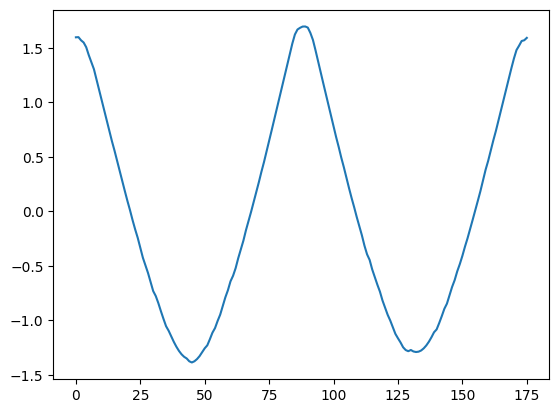

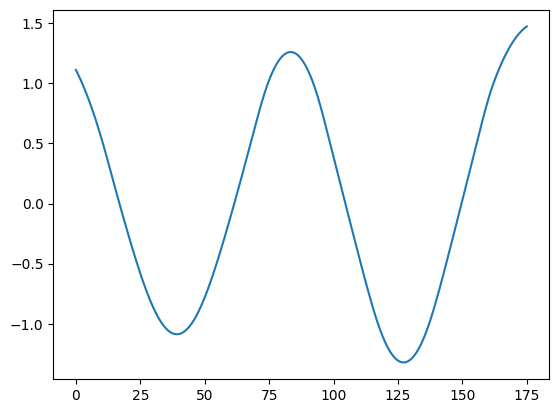

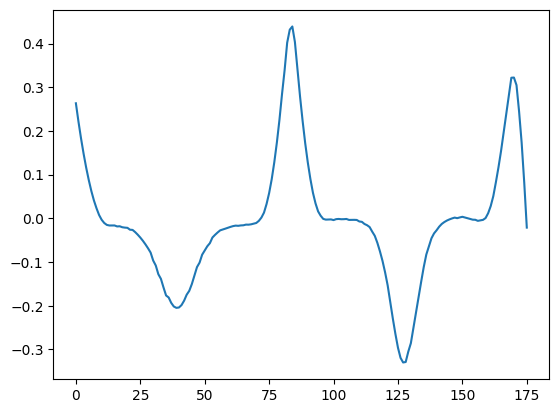

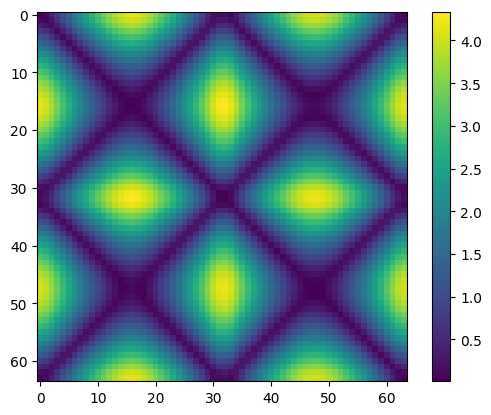

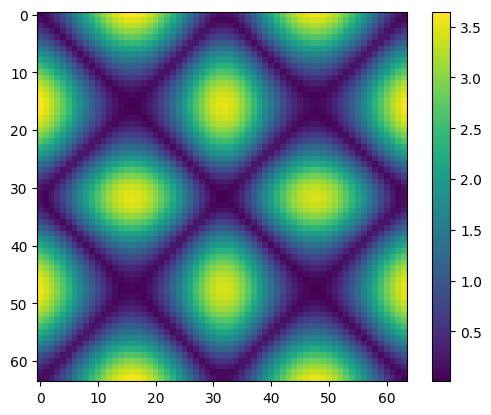

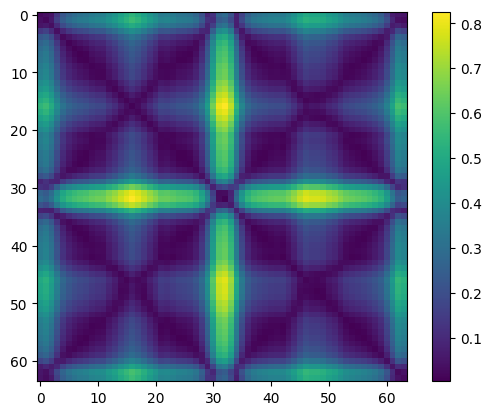

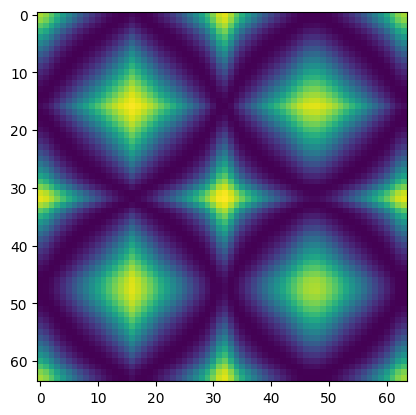

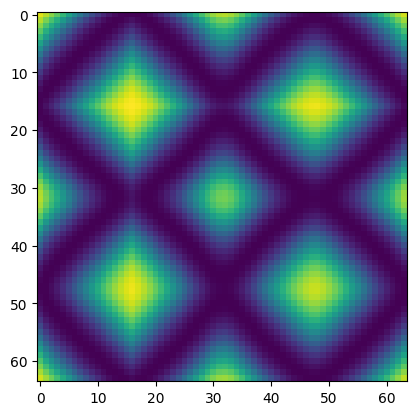

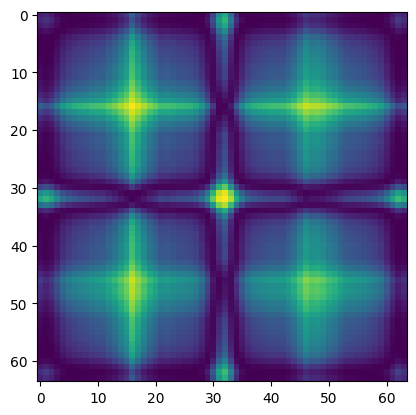

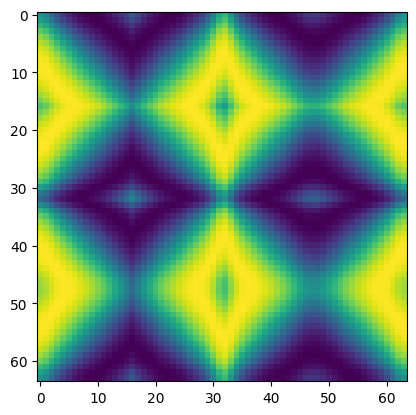

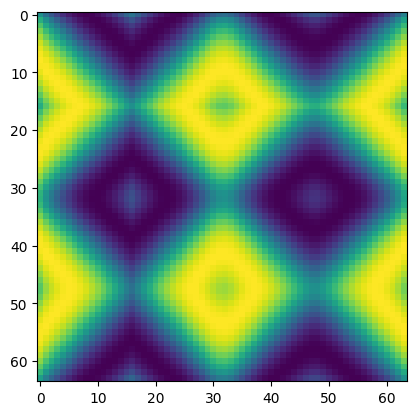

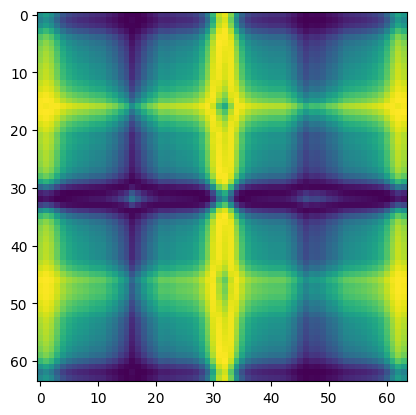

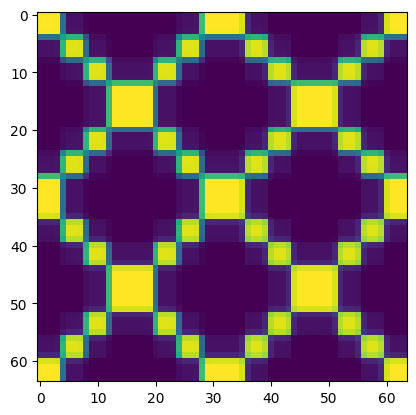

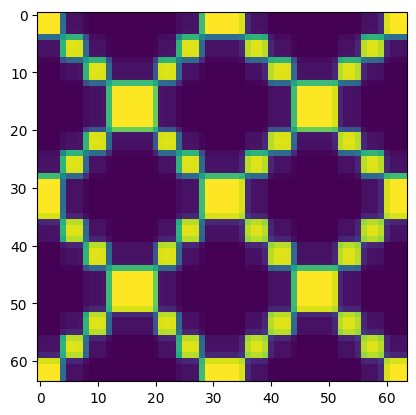

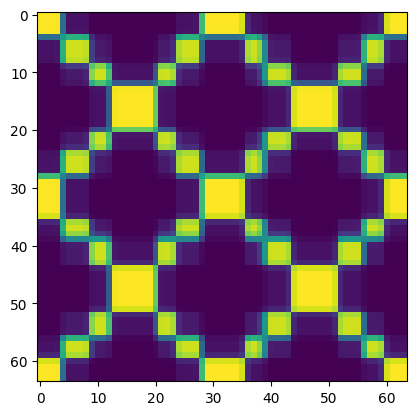

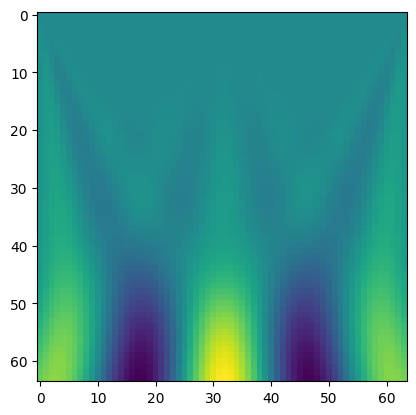

In [ ]:
for i in range(1):
    plt.plot(ucr_train_re[i], label="original")
    plt.show()
    plt.plot(train_tr[i])
    plt.show()
    plt.plot(train_res[i])
    plt.show()
    plt.imshow(train_rp[i], label = 'rp')
    plt.colorbar()
    plt.show()
    plt.imshow(train_trrp[i], label = 'trrp')
    plt.colorbar()
    plt.show()
    plt.imshow(train_rerp[i], label="rerp")
    plt.colorbar()
    plt.show()
    plt.imshow(train_gas[i], label = 'grs')
    #plt.colorbar()
    plt.show()
    plt.imshow(train_trgas[i], label = 'trgrs')
    #plt.colorbar()
    plt.show()
    plt.imshow(train_regas[i], label = 'regrs')
    #plt.colorbar()
    plt.show()
    plt.imshow(train_gad[i], label = 'grd')
    #plt.colorbar()
    plt.show()
    plt.imshow(train_trgad[i], label = 'trgrd')
    #plt.colorbar()
    plt.show()
    plt.imshow(train_regad[i], label = 'regrd')
    #plt.colorbar()
    plt.show()
    plt.imshow(train_mk[i], label = 'mk')
    #plt.colorbar()
    plt.show()
    plt.imshow(train_trmk[i], label = 'remk')
    #plt.colorbar()
    plt.show()
    plt.imshow(train_remk[i], label = 'trmk')
    #plt.colorbar()
    plt.show()
    plt.imshow(train_ctwav[i], label = 'ctwav')
    #plt.colorbar()
    plt.show()

In [ ]:
if __name__ == "__main__":
    from torchsummary import summary
    import pdb
    transitions = [True, True, True, True]
    layers = [3, 3,3,3]
    mlp_ratios = [4, 4,4,4]
    embed_dims = [24, 48, 96, 192]
    offset_size = [9, 7, 3, 2 ]    #[8,7,2, 2]
    model = CycleNet(layers,3 ,embed_dims=embed_dims, patch_size=7, transitions=transitions, num_classes = class_num,
                     mlp_ratios=mlp_ratios, mlp_fn=CycleMLP, offset_size = offset_size).to(device)
summary(model, (3,64,64), device = 'cuda')

In [ ]:
torch.backends.cudnn.enabled = False

# Auto exploration

In [ ]:
!apt-get install swig
!pip install smac

# 원래 돌리던거

In [ ]:
import warnings

import numpy as np
from ConfigSpace import (
    BetaIntegerHyperparameter,
    CategoricalHyperparameter,
    Configuration,
    ConfigurationSpace,
    NormalFloatHyperparameter,
    UniformIntegerHyperparameter,
)
from sklearn.datasets import load_digits
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier

from smac import HyperparameterOptimizationFacade, Scenario
from smac.acquisition.function import PriorAcquisitionFunction

__copyright__ = "Copyright 2021, AutoML.org Freiburg-Hannover"
__license__ = "3-clause BSD"


img_test_acc = 0
candi = 0


class Babroad:
    @property
    def configspace(self) -> ConfigurationSpace:
        # Build Configuration Space which defines all parameters and their ranges.
        # To illustrate different parameter types,
        # we use continuous, integer and categorical parameters.
        cs = ConfigurationSpace()
        RP = CategoricalHyperparameter(
            "RP",
            ["rp", "none"],
            default_value = "rp",
        )
        RERP = CategoricalHyperparameter(
            "RERP",
            ["rerp", "none"],
            default_value = "none",
        )
        TRRP = CategoricalHyperparameter(
            "TRRP",
            ["trrp", "none"],
            default_value = "none",
        )
        GAS = CategoricalHyperparameter(
            "GAS",
            ["gas", "none"],
            default_value = "gas",
        )
        REGAS = CategoricalHyperparameter(
            "REGAS",
            ["regas", "none"],
            default_value = "none",
        )
        TRGAS = CategoricalHyperparameter(
            "TRGAS",
            ["trgas", "none"],
            default_value = "none",
        )
        GAD = CategoricalHyperparameter(
            "GAD",
            ["gad", "none"],
            default_value = "gad",
        )
        REGAD = CategoricalHyperparameter(
            "REGAD",
            ["regad", "none"],
            default_value = "none",
        )
        TRGAD = CategoricalHyperparameter(
            "TRGAD",
            ["trgad", "none"],
            default_value = "none",
        )
        MK = CategoricalHyperparameter(
            "MK",
            ["mk", "none"],
            default_value = "none",
        )
        REMK = CategoricalHyperparameter(
            "REMK",
            ["remk", "none"],
            default_value = "none",
        )
        TRMK = CategoricalHyperparameter(
            "TRMK",
            ["trmk", "none"],
            default_value = "none",
        )
        CTW = CategoricalHyperparameter(
            "CTW",
            ["ctwav", "none"],
            default_value = "none",
        )
        # We do not have an educated belief on the number of layers beforehand
        # As such, the prior on the HP is uniform
        n_stage = UniformIntegerHyperparameter(
            "n_stage",
            lower=2,
            upper=4,
            default_value = 4,
        )

        # We believe the optimal network is likely going to be relatively wide,
        # And place a Beta Prior skewed towards wider networks in log space
        n_cells = UniformIntegerHyperparameter(
            "n_cells",
            lower=1,
            upper=3,
            default_value = 3,
        )
        n_dims = UniformIntegerHyperparameter(
            "n_dims",
            lower=12,
            upper=96,
            default_value = 24,
        )

        # We believe that ReLU is likely going to be the optimal activation function about
        # 60% of the time, and thus place weight on that accordingly

        # Add all hyperparameters at once:
        cs.add_hyperparameters([n_stage, n_cells, n_dims, RP, RERP, TRRP, GAS, REGAS, TRGAS, GAD, REGAD, TRGAD, MK, REMK, TRMK, CTW])

        return cs

    def train(self, config: Configuration, seed: int = 0) -> float:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            infeature_list = []   # 선택된 입력 특징 저장되는 리스트
            if config["RP"] != "none":
                infeature_list.append(config["RP"])
            if config["RERP"] != "none":
                infeature_list.append(config["RERP"])
            if config["TRRP"] != "none":
                infeature_list.append(config["TRRP"])
            if config["GAS"] != "none":
                infeature_list.append(config["GAS"])
            if config["REGAS"] != "none":
                infeature_list.append(config["REGAS"])
            if config["TRGAS"] != "none":
                infeature_list.append(config["TRGAS"])
            if config["GAD"] != "none":
                infeature_list.append(config["GAD"])
            if config["REGAD"] != "none":
                infeature_list.append(config["REGAD"])
            if config["TRGAD"] != "none":
                infeature_list.append(config["TRGAD"])
            if config["MK"] != "none":
                infeature_list.append(config["MK"])
            if config["REMK"] != "none":
                infeature_list.append(config["REMK"])
            if config["TRMK"] != "none":
                infeature_list.append(config["TRMK"])
            if config["CTW"] != "none":
                infeature_list.append(config["CTW"])
            print(infeature_list)
            channel_num = len(infeature_list)
            train_stack = stacking(input_size, train_size, channel_num, infeature_list)
            test_stack = stacking(input_size, train_size, channel_num, infeature_list)
            train_all = train_stack(train_dict)
            test_all = test_stack(test_dict)

            train_data = CustomDataset(train_all, ucr_target_train)
            trainloader = DataLoader(train_data, batch_size = 32, shuffle = True)
            test_data = CustomDataset(test_all, ucr_target_test)
            testloader = DataLoader(test_data, batch_size =32, shuffle = False )

            stage = config["n_stage"]
            cell = config["n_cells"]
            dims = config["n_dims"]
            cells = [] # net 구조 위한 리스트
            embed_dims = [] # net 구조 위한 리스트
            if dims%2 != 0:
                dims = dims +1
            for s in range(stage):
                if s == 0 :
                    cells = cell
                    embed_dims = dims
                else :
                    add_cell = cell
                    dims = 2*dims
                    cells = np.append(cells, add_cell)
                    embed_dims = np.append(embed_dims, dims)

            cells = cells.tolist()
            embed_dims = embed_dims.tolist()
            print("embed_dims : ", embed_dims)
            print("cells : ", cells)
            transitions = [True, True, True, True]
            mlp_ratios = [4, 4,4,4]
            offset_size = [16, 8, 4, 2]
            model = CycleNet(cells, channel_num, embed_dims=embed_dims, patch_size=7, transitions=transitions, num_classes=class_num,
                     mlp_ratios=mlp_ratios, mlp_fn=CycleMLP, offset_size = offset_size).to(device)
            parameter_num = count_parameters(model)
            print("parameter_num : ", parameter_num )
            if (parameter_num < 2300000) and (parameter_num>1700000):
                print("skip")
                return 100
            elif (parameter_num > 2400000):
                print("skip")
                return 100
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr = 0.0001)
            loss_list = []
            iter = []
            train_accuracy = []
            validation_loss = []
            validation_acc = []
            model.train()
            epochs = 150
            print("epoch:", epochs)
            for epoch in range(epochs):
                running_loss = 0.0
                correct = 0.0
                total = 0.0
                for data in trainloader:
                    input,target = data[0].to(device), data[1].to(device)
                    optimizer.zero_grad()
                    output = model(input)
                    loss = criterion(output, target)
                    loss.backward()
                    optimizer.step()
                    _, preds = torch.max(output.data, 1)
                    correct += preds.eq(target).sum().item()
                    running_loss += loss.item()
            training_loss = running_loss/len(trainloader)
            train_acc = 100*correct/len(trainloader.dataset)

            #print("=============================================================================================================================================================")
            print(f"TRAIN: EPOCH {epoch + 1:04d} / {epochs:04d} | Epoch LOSS {training_loss:.4f} | Epoch ACC {train_acc:.4f}")
            cost = running_loss/6
            loss_list.append(training_loss)
            global candi
            candi = candi + 1
            train_accuracy.append(train_acc)
            running_loss = 0.0
            print('finish')
            correct = 0
            total = 0
            accuracy = []
            iter_acc = []
            test_loss = []
            b=0
            global img_test_acc
            model.eval()
            with torch.no_grad():
                for data in testloader :
                    b+=1
                    images, labels = data[0].to(device), data[1].to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    iter_acc.append(b)
                    cost = 100*correct/total
                    accuracy.append(cost)

                test_loss.append(loss)
                error_rate = 1-(correct/total)
                test_acc = 100. * correct / len(testloader.dataset)
            if img_test_acc<test_acc:
                img_test_acc = test_acc
                torch.save(model.state_dict(), PATH + 'PhalangesOutlinesCorrect(smac3)1.pt')
                print("save best test")

            print('accuracy of testimages: %d %%' %(test_acc))
            print('best_acc : ', img_test_acc)
            print('error rate : ', format(error_rate, ".3f"))
            print("=============================================================================================================================================================")
        return 100-test_acc


if __name__ == "__main__":
    mlp = Babroad()
    default_config = mlp.configspace.get_default_configuration()

    # Define our environment variables
    scenario = Scenario(mlp.configspace, n_trials=100)

    # We also want to include our default configuration in the initial design
    initial_design = HyperparameterOptimizationFacade.get_initial_design(
        scenario,
        additional_configs=[default_config],
    )

    # We define the prior acquisition function, which conduct the optimization using priors over the optimum
    acquisition_function = PriorAcquisitionFunction(
        acquisition_function=HyperparameterOptimizationFacade.get_acquisition_function(scenario),
        decay_beta=scenario.n_trials / 10,  # Proven solid value
    )

    # We only want one config call (use only one seed in this example)
    intensifier = HyperparameterOptimizationFacade.get_intensifier(
        scenario,
        max_config_calls=1
    )

    # Create our SMAC object and pass the scenario and the train method
    smac = HyperparameterOptimizationFacade(
        scenario,
        mlp.train,
        initial_design=initial_design,
        acquisition_function=acquisition_function,
        intensifier=intensifier,
        overwrite=True,
    )

    incumbent = smac.optimize()

    # Get cost of default configuration
    default_cost = smac.validate(default_config)
    print(f"Default cost: {default_cost}")

    # Let's calculate the cost of the incumbent
    incumbent_cost = smac.validate(incumbent)
    print(f"choosed cost: {incumbent_cost}")

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 160 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 1 additional configurations.
[WARNING][prior_acqusition_function.py:107] Discretizing the prior for random forest models.
['trrp', 'gas', 'regas', 'trgas', 'mk', 'ctwav']
embed_dims :  [92, 184, 368, 736]
cells :  [1, 1, 1, 1]
parameter_num :  14894411
skip
[INFO][abstract_intensifier.py:515] Added config 4ac5cb as new incumbent because there are no incumbents yet.
['rp', 'rerp', 'gad', 'regad', 'trgad', 'remk', 'trmk']
embed_dims :  [50, 100, 200]
cells :  [2, 2, 2]
parameter_num :  1769776
skip
['rp', 'rerp', 'trrp', 'gas', 'regad', 'trgad', 'mk', 'trmk']
embed_dims :  [30, 60, 120]
cells :  [2, 2, 2]
parameter_num :  645736
epoch: 150
TRAIN: EPOCH 0150 / 0150 | Epoch LOSS 0.1021 | Epoch ACC 96.0000
finish
save best test
accuracy of testimages: 87 %
best_acc :  87.97250859106529
error 

# 시간 측정 코드 추가된거

In [ ]:
import warnings

import numpy as np
from ConfigSpace import (
    BetaIntegerHyperparameter,
    CategoricalHyperparameter,
    Configuration,
    ConfigurationSpace,
    NormalFloatHyperparameter,
    UniformIntegerHyperparameter,
)
from sklearn.datasets import load_digits
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier

from smac import HyperparameterOptimizationFacade, Scenario
from smac.acquisition.function import PriorAcquisitionFunction

__copyright__ = "Copyright 2021, AutoML.org Freiburg-Hannover"
__license__ = "3-clause BSD"


img_test_acc = 0
candi = 0

train_time_list = []
avg_trtime = 0
test_time_list = []
#avg_tetime
total_time_list = []
avg_total_time = 0
time_count = 0


class Babroad:
    @property
    def configspace(self) -> ConfigurationSpace:
        # Build Configuration Space which defines all parameters and their ranges.
        # To illustrate different parameter types,
        # we use continuous, integer and categorical parameters.
        cs = ConfigurationSpace()
        RP = CategoricalHyperparameter(
            "RP",
            ["rp", "none"],
            default_value = "rp",
        )
        RERP = CategoricalHyperparameter(
            "RERP",
            ["rerp", "none"],
            default_value = "none",
        )
        TRRP = CategoricalHyperparameter(
            "TRRP",
            ["trrp", "none"],
            default_value = "none",
        )
        GAS = CategoricalHyperparameter(
            "GAS",
            ["gas", "none"],
            default_value = "gas",
        )
        REGAS = CategoricalHyperparameter(
            "REGAS",
            ["regas", "none"],
            default_value = "none",
        )
        TRGAS = CategoricalHyperparameter(
            "TRGAS",
            ["trgas", "none"],
            default_value = "none",
        )
        GAD = CategoricalHyperparameter(
            "GAD",
            ["gad", "none"],
            default_value = "gad",
        )
        REGAD = CategoricalHyperparameter(
            "REGAD",
            ["regad", "none"],
            default_value = "none",
        )
        TRGAD = CategoricalHyperparameter(
            "TRGAD",
            ["trgad", "none"],
            default_value = "none",
        )
        MK = CategoricalHyperparameter(
            "MK",
            ["mk", "none"],
            default_value = "none",
        )
        REMK = CategoricalHyperparameter(
            "REMK",
            ["remk", "none"],
            default_value = "none",
        )
        TRMK = CategoricalHyperparameter(
            "TRMK",
            ["trmk", "none"],
            default_value = "none",
        )
        CTW = CategoricalHyperparameter(
            "CTW",
            ["ctwav", "none"],
            default_value = "none",
        )
        # We do not have an educated belief on the number of layers beforehand
        # As such, the prior on the HP is uniform
        n_stage = UniformIntegerHyperparameter(
            "n_stage",
            lower=2,
            upper=4,
            default_value = 4,
        )

        # We believe the optimal network is likely going to be relatively wide,
        # And place a Beta Prior skewed towards wider networks in log space
        n_cells = UniformIntegerHyperparameter(
            "n_cells",
            lower=1,
            upper=3,
            default_value = 3,
        )
        n_dims = UniformIntegerHyperparameter(
            "n_dims",
            lower=12,
            upper=96,
            default_value = 24,
        )

        # We believe that ReLU is likely going to be the optimal activation function about
        # 60% of the time, and thus place weight on that accordingly

        # Add all hyperparameters at once:
        cs.add_hyperparameters([n_stage, n_cells, n_dims, RP, RERP, TRRP, GAS, REGAS, TRGAS, GAD, REGAD, TRGAD, MK, REMK, TRMK, CTW])

        return cs

    def train(self, config: Configuration, seed: int = 0) -> float:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            infeature_list = []   # 선택된 입력 특징 저장되는 리스트
            if config["RP"] != "none":
                infeature_list.append(config["RP"])
            if config["RERP"] != "none":
                infeature_list.append(config["RERP"])
            if config["TRRP"] != "none":
                infeature_list.append(config["TRRP"])
            if config["GAS"] != "none":
                infeature_list.append(config["GAS"])
            if config["REGAS"] != "none":
                infeature_list.append(config["REGAS"])
            if config["TRGAS"] != "none":
                infeature_list.append(config["TRGAS"])
            if config["GAD"] != "none":
                infeature_list.append(config["GAD"])
            if config["REGAD"] != "none":
                infeature_list.append(config["REGAD"])
            if config["TRGAD"] != "none":
                infeature_list.append(config["TRGAD"])
            if config["MK"] != "none":
                infeature_list.append(config["MK"])
            if config["REMK"] != "none":
                infeature_list.append(config["REMK"])
            if config["TRMK"] != "none":
                infeature_list.append(config["TRMK"])
            if config["CTW"] != "none":
                infeature_list.append(config["CTW"])
            # print(infeature_list)
            channel_num = len(infeature_list)
            train_stack = stacking(input_size, train_size, channel_num, infeature_list)
            test_stack = stacking(input_size, train_size, channel_num, infeature_list)
            train_all = train_stack(train_dict)
            test_all = test_stack(test_dict)

            train_data = CustomDataset(train_all, ucr_target_train)
            trainloader = DataLoader(train_data, batch_size = 32, shuffle = True)
            test_data = CustomDataset(test_all, ucr_target_test)
            testloader = DataLoader(test_data, batch_size =32, shuffle = False )

            stage = config["n_stage"]
            cell = config["n_cells"]
            dims = config["n_dims"]
            cells = [] # net 구조 위한 리스트
            embed_dims = [] # net 구조 위한 리스트
            if dims%2 != 0:
                dims = dims +1
            for s in range(stage):
                if s == 0 :
                    cells = cell
                    embed_dims = dims
                else :
                    add_cell = cell
                    dims = 2*dims
                    cells = np.append(cells, add_cell)
                    embed_dims = np.append(embed_dims, dims)

            cells = cells.tolist()
            embed_dims = embed_dims.tolist()
            transitions = [True, True, True, True]
            mlp_ratios = [4, 4,4,4]
            offset_size = [16, 8, 4, 2]
            model = CycleNet(cells, channel_num, embed_dims=embed_dims, patch_size=7, transitions=transitions, num_classes=class_num,
                     mlp_ratios=mlp_ratios, mlp_fn=CycleMLP, offset_size = offset_size).to(device)
            parameter_num = count_parameters(model)
            macs, params = get_model_complexity_info(model, (channel_num, 64,64), as_strings=False,
                                           print_per_layer_stat=False, verbose=False)
            string_macs, params = get_model_complexity_info(model, (channel_num, 64,64), as_strings=True,
                                           print_per_layer_stat=False, verbose=False)
            real_epochs = 0
            if (parameter_num > 2340000):
                print("skip")
                return 100
            if (parameter_num < 500000 ):
                real_epochs = 50
            elif (parameter_num >500000) and (parameter_num<1200000):
                real_epochs = 100
            elif (parameter_num>1200000):
                real_epochs = 150
            print("infeature_list : ",infeature_list)
            print("cells : ", cells)
            print("embed_dims : ", embed_dims)
            print("parameter_num : ", parameter_num )
            print("macs : ", string_macs)
            print("flops : ", macs*2)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr = 0.0001)
            loss_list = []
            iter = []
            train_accuracy = []
            validation_loss = []
            validation_acc = []
            model.train()
            epochs = 1
            print("epoch:", epochs)
            print("real_epochs:",real_epochs)
            train_start = time.time()
            for epoch in range(epochs):
                running_loss = 0.0
                correct = 0.0
                total = 0.0
                for data in trainloader:
                    input,target = data[0].to(device), data[1].to(device)
                    optimizer.zero_grad()
                    output = model(input)
                    loss = criterion(output, target)
                    loss.backward()
                    optimizer.step()
                    _, preds = torch.max(output.data, 1)
                    correct += preds.eq(target).sum().item()
                    running_loss += loss.item()
            training_loss = running_loss/len(trainloader)
            train_acc = 100*correct/len(trainloader.dataset)
            train_end = time.time()
            train_total = (train_end-train_start)*real_epochs
            print("train_time : ", train_total)
            #print("=============================================================================================================================================================")
            print(f"TRAIN: EPOCH {epoch + 1:04d} / {epochs:04d} | Epoch LOSS {training_loss:.4f} | Epoch ACC {train_acc:.4f}")
            cost = running_loss/6
            loss_list.append(training_loss)
            global candi
            candi = candi + 1
            train_accuracy.append(train_acc)
            running_loss = 0.0
            print('finish')
            correct = 0
            total = 0
            accuracy = []
            iter_acc = []
            test_loss = []
            b=0
            global img_test_acc
            model.eval()
            test_start = time.time()
            with torch.no_grad():
                for data in testloader :
                    b+=1
                    images, labels = data[0].to(device), data[1].to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    iter_acc.append(b)
                    cost = 100*correct/total
                    accuracy.append(cost)

                test_loss.append(loss)
                error_rate = 1-(correct/total)
                test_acc = 100. * correct / len(testloader.dataset)
            test_end = time.time()
            test_time = (test_end-test_start)
            print("test_time : ", test_time)
            all_time = test_time + train_total
            all_time = datetime.timedelta(seconds = all_time)
            print("total_time : ", test_time+train_total)
            print("all_time : ", all_time)
            global time_count
            time_count = time_count+1
            if img_test_acc<test_acc:
                img_test_acc = test_acc
                torch.save(model.state_dict(), PATH + 'PhalangesOutlinesCorrect(smac3)1.pt')
                print("save best test")
            print('accuracy of testimages: %d %%' %(test_acc))
            print('best_acc : ', img_test_acc)
            print('error rate : ', format(error_rate, ".3f"))
            print("=============================================================================================================================================================")
        return 100-test_acc


if __name__ == "__main__":
    mlp = Babroad()
    default_config = mlp.configspace.get_default_configuration()

    # Define our environment variables
    scenario = Scenario(mlp.configspace, n_trials=5)

    # We also want to include our default configuration in the initial design
    initial_design = HyperparameterOptimizationFacade.get_initial_design(
        scenario,
        additional_configs=[default_config],
    )

    # We define the prior acquisition function, which conduct the optimization using priors over the optimum
    acquisition_function = PriorAcquisitionFunction(
        acquisition_function=HyperparameterOptimizationFacade.get_acquisition_function(scenario),
        decay_beta=scenario.n_trials / 10,  # Proven solid value
    )

    # We only want one config call (use only one seed in this example)
    intensifier = HyperparameterOptimizationFacade.get_intensifier(
        scenario,
        max_config_calls=1
    )

    # Create our SMAC object and pass the scenario and the train method
    smac = HyperparameterOptimizationFacade(
        scenario,
        mlp.train,
        initial_design=initial_design,
        acquisition_function=acquisition_function,
        intensifier=intensifier,
        overwrite=True,
    )

    incumbent = smac.optimize()

    # Get cost of default configuration
    default_cost = smac.validate(default_config)
    print(f"Default cost: {default_cost}")

    # Let's calculate the cost of the incumbent
    incumbent_cost = smac.validate(incumbent)
    print(f"choosed cost: {incumbent_cost}")

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 160 to 1 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 1 initial design configurations and 1 additional configurations.
[WARNING][prior_acqusition_function.py:107] Discretizing the prior for random forest models.
skip
[INFO][abstract_intensifier.py:515] Added config 4ac5cb as new incumbent because there are no incumbents yet.
infeature_list :  ['rp', 'gas', 'gad']
cells :  [3, 3, 3, 3]
embed_dims :  [24, 48, 96, 192]
parameter_num :  2305016
macs :  22.52 MMac
flops :  45043336
epoch: 1
real_epochs: 150
train_time :  177.51717567443848
TRAIN: EPOCH 0001 / 0001 | Epoch LOSS 0.5375 | Epoch ACC 74.0620
finish
test_time :  0.23986339569091797
total_time :  177.7570390701294
all_time :  0:02:57.757039
save best test
accuracy of testimages: 64 %
best_acc :  64.32432432432432
error rate :  0.357
[INFO][abstract_intensifier.py:590] Added config 23b5ba and rejected config 4ac5cb as incum

# 원본 모델 결과를 얻기 위한거

In [ ]:
import warnings

import numpy as np
from ConfigSpace import (
    BetaIntegerHyperparameter,
    CategoricalHyperparameter,
    Configuration,
    ConfigurationSpace,
    NormalFloatHyperparameter,
    UniformIntegerHyperparameter,
)
from sklearn.datasets import load_digits
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier

from smac import HyperparameterOptimizationFacade, Scenario
from smac.acquisition.function import PriorAcquisitionFunction

__copyright__ = "Copyright 2021, AutoML.org Freiburg-Hannover"
__license__ = "3-clause BSD"

#global img_test_acc
img_test_acc = 0
global candi
candi = 0


class Babroad:
    @property
    def configspace(self) -> ConfigurationSpace:
        # Build Configuration Space which defines all parameters and their ranges.
        # To illustrate different parameter types,
        # we use continuous, integer and categorical parameters.
        cs = ConfigurationSpace()

        n_epochs = UniformIntegerHyperparameter(
            "n_epochs",
            lower=1,
            upper=3,
            default_value = 2
        )

        # We believe that ReLU is likely going to be the optimal activation function about
        # 60% of the time, and thus place weight on that accordingly

        # Add all hyperparameters at once:
        cs.add_hyperparameters([n_epochs])

        return cs

    def train(self, config: Configuration, seed: int = 0) -> float:
        with warnings.catch_warnings():
            channel_num = 3
            train_all = np.concatenate((train_dict["rp"],train_dict["gas"],train_dict["gad"]),axis = 1)
            test_all = np.concatenate((test_dict["rp"], test_dict["gas"], test_dict["gad"]), axis = 1)
            train_data = CustomDataset(train_all, ucr_target_train)
            trainloader = DataLoader(train_data, batch_size = 32, shuffle = True)
            test_data = CustomDataset(test_all, ucr_target_test)
            testloader = DataLoader(test_data, batch_size =32, shuffle = False )

            stage = 2
            cell = 3
            dims = 24
            cells = [] # net 구조 위한 리스트
            embed_dims = [] # net 구조 위한 리스트
            if dims%2 != 0:
                dims = dims +1
            for s in range(stage):
                if s == 0 :
                    cells = cell
                    embed_dims = dims
                else :
                    add_cell = cell
                    dims = 2*dims
                    cells = np.append(cells, add_cell)
                    embed_dims = np.append(embed_dims, dims)

            cells = cells.tolist()
            embed_dims = embed_dims.tolist()
            print("embed_dims : ", embed_dims)
            print("cells : ", cells)
            transitions = [True, True, True, True]
            mlp_ratios = [4, 4,4,4]
            offset_size = [16, 8, 4, 2]
            model = CycleNet(cells, channel_num, embed_dims=embed_dims, patch_size=7, transitions=transitions, num_classes=class_num,
                     mlp_ratios=mlp_ratios, mlp_fn=CycleMLP, offset_size = offset_size).to(device)
            parameter_num = count_parameters(model)
            print("parameter_num : ", parameter_num )

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr = 0.0001)
            loss_list = []
            iter = []
            train_accuracy = []
            validation_loss = []
            validation_acc = []
            model.train()
            epochs = config["n_epochs"]
            epochs = 50*epochs
            print("epoch:", epochs)
            for epoch in range(epochs):
                running_loss = 0.0
                correct = 0.0
                total = 0.0
                for data in trainloader:
                    input,target = data[0].to(device), data[1].to(device)
                    optimizer.zero_grad()
                    output = model(input)
                    loss = criterion(output, target)
                    loss.backward()
                    optimizer.step()
                    _, preds = torch.max(output.data, 1)
                    correct += preds.eq(target).sum().item()
                    running_loss += loss.item()
            training_loss = running_loss/len(trainloader)
            train_acc = 100*correct/len(trainloader.dataset)

            #print("=============================================================================================================================================================")
            print(f"TRAIN: EPOCH {epoch + 1:04d} / {epochs:04d} | Epoch LOSS {training_loss:.4f} | Epoch ACC {train_acc:.4f}")
            cost = running_loss/6
            loss_list.append(training_loss)
            global candi
            candi = candi + 1
            train_accuracy.append(train_acc)
            running_loss = 0.0
            print('finish')
            correct = 0
            total = 0
            accuracy = []
            iter_acc = []
            test_loss = []
            b=0
            global img_test_acc
            model.eval()
            with torch.no_grad():
                for data in testloader :
                    b+=1
                    images, labels = data[0].to(device), data[1].to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    iter_acc.append(b)
                    cost = 100*correct/total
                    accuracy.append(cost)

                test_loss.append(loss)
                error_rate = 1-(correct/total)
                test_acc = 100. * correct / len(testloader.dataset)
            if img_test_acc<test_acc:
                img_test_acc = test_acc
                #torch.save(model.state_dict(), PATH + 'PhalangesOutlinesCorrect(smac3)1.pt')
                print("save best test")
            print('accuracy of testimages: %d %%' %(test_acc))
            print('best_acc : ', img_test_acc)
            print('error rate : ', format(error_rate, ".3f"))
            print("=============================================================================================================================================================")
        return 100-test_acc


if __name__ == "__main__":
    mlp = Babroad()
    default_config = mlp.configspace.get_default_configuration()

    # Define our environment variables
    scenario = Scenario(mlp.configspace, n_trials=2)

    # We also want to include our default configuration in the initial design
    initial_design = HyperparameterOptimizationFacade.get_initial_design(
        scenario,
        additional_configs=[default_config],
    )

    # We define the prior acquisition function, which conduct the optimization using priors over the optimum
    acquisition_function = PriorAcquisitionFunction(
        acquisition_function=HyperparameterOptimizationFacade.get_acquisition_function(scenario),
        decay_beta=scenario.n_trials / 10,  # Proven solid value
    )

    # We only want one config call (use only one seed in this example)
    intensifier = HyperparameterOptimizationFacade.get_intensifier(
        scenario,
        max_config_calls=1
    )

    # Create our SMAC object and pass the scenario and the train method
    smac = HyperparameterOptimizationFacade(
        scenario,
        mlp.train,
        initial_design=initial_design,
        acquisition_function=acquisition_function,
        intensifier=intensifier,
        overwrite=True,
    )

    incumbent = smac.optimize()

    # Get cost of default configuration
    default_cost = smac.validate(default_config)
    print(f"Default cost: {default_cost}")

    # Let's calculate the cost of the incumbent
    incumbent_cost = smac.validate(incumbent)
    print(f"choosed cost: {incumbent_cost}")

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 10 to 1 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 1 initial design configurations and 1 additional configurations.
[WARNING][prior_acqusition_function.py:107] Discretizing the prior for random forest models.
embed_dims :  [24, 48]
cells :  [3, 3]
parameter_num :  135753
epoch: 50
TRAIN: EPOCH 0050 / 0050 | Epoch LOSS 0.9007 | Epoch ACC 86.6667
finish
save best test
accuracy of testimages: 66 %
best_acc :  66.0
error rate :  0.340
[INFO][abstract_intensifier.py:515] Added config c7f74d as new incumbent because there are no incumbents yet.
embed_dims :  [24, 48]
cells :  [3, 3]
parameter_num :  135753
epoch: 100
TRAIN: EPOCH 0100 / 0100 | Epoch LOSS 0.5488 | Epoch ACC 100.0000
finish
save best test
accuracy of testimages: 87 %
best_acc :  87.88888888888889
error rate :  0.121
[INFO][abstract_intensifier.py:590] Added config eb5755 and rejected config c7f74d as incumbent becaus